# Data Handling - Quick Intro to Pandas

Lets start by importing the package:

In [1]:
import pandas as pd

In [7]:
#help(pd.DataFrame)

DataFrame is a very important class inside pandas, that allows to structure data in a unified way. This class has  many interesting methods that can help transforme and analyze data.

## Reading Data

In [10]:
# Lets start by reading a csv file

data = pd.read_csv('data/AirPassengers.csv')
data.to_stata("data/AirPassengers.dta")
data.to_excel("data/AirPassengers.xlsx", index=False)
data.to_json("data/AirPassengers.json")

data.head()
#pd.DataFrame.head(data)

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [11]:
# Since the DataFrame is an important class that we will use many times it is better to call it a shorter name, say df

from pandas import DataFrame as df

df.head(data)

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


In [12]:
data_json = pd.read_json('data/AirPassengers.json')
data_excel = pd.read_excel('data/AirPassengers.xlsx')
data_stata = pd.read_stata('data/AirPassengers.dta')
data_json.head()

,TravelDate,Passengers
0,1/1/1949,112
1,2/1/1949,118
2,3/1/1949,132
3,4/1/1949,129
4,5/1/1949,121


## Selecting a column

In [13]:
data['TravelDate'].head()

0    1/1/1949
1    2/1/1949
2    3/1/1949
3    4/1/1949
4    5/1/1949
Name: TravelDate, dtype: object

In [14]:
# an alternative way that looks a lot like Matlab is the iloc method
data.iloc[:,0]

0       1/1/1949
1       2/1/1949
2       3/1/1949
3       4/1/1949
4       5/1/1949
         ...    
139     8/1/1960
140     9/1/1960
141    10/1/1960
142    11/1/1960
143    12/1/1960
Name: TravelDate, Length: 144, dtype: object

In [15]:
data.loc[0:5, 'TravelDate']

0    1/1/1949
1    2/1/1949
2    3/1/1949
3    4/1/1949
4    5/1/1949
5    6/1/1949
Name: TravelDate, dtype: object

## Data Index 

It is important to check the index. For instance, you might be interested in having the dates as an index when working with a times series

In [16]:
data.index = data['TravelDate']
data.head()

,TravelDate,Passengers
TravelDate,,
1/1/1949,1/1/1949,112
2/1/1949,2/1/1949,118
3/1/1949,3/1/1949,132
4/1/1949,4/1/1949,129
5/1/1949,5/1/1949,121


In [17]:
data.loc["1/1/1949":"5/1/1949", "Passengers"]

TravelDate
1/1/1949    112
2/1/1949    118
3/1/1949    132
4/1/1949    129
5/1/1949    121
Name: Passengers, dtype: int64

In [18]:
data2 = data['Passengers']

## Quick Plot

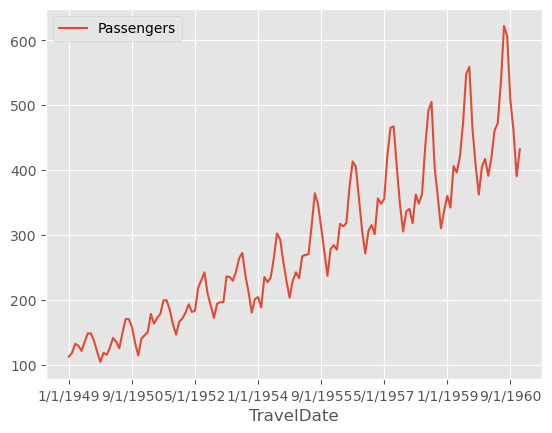

In [19]:
import matplotlib.pyplot as plt
plt.style.use('ggplot') # Make the graphs a bit prettier
data.plot()
plt.show()

## Describing Data

In [20]:
#help(pd.DataFrame.describe)

data.describe(include='all')

,TravelDate,Passengers
count,144,144.000000
unique,144,NaN
top,4/1/1952,NaN
freq,1,NaN
mean,NaN,280.298611
std,NaN,119.966317
min,NaN,104.000000
25%,NaN,180.000000
50%,NaN,265.500000
75%,NaN,360.500000


In [21]:
# A great feature of Pandas is that simililarly to the symbol $ in R, 
# each variable becomes an attribute to the dataframe.
data.Passengers.describe()

count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: Passengers, dtype: float64

## Slicing and Dropping

In [22]:
# To slice 
data['Passengers'][0:5]

TravelDate
1/1/1949    112
2/1/1949    118
3/1/1949    132
4/1/1949    129
5/1/1949    121
Name: Passengers, dtype: int64

In [23]:
# To drop a variable
data.drop(labels='TravelDate', axis=1).head(5)

,Passengers
TravelDate,
1/1/1949,112
2/1/1949,118
3/1/1949,132
4/1/1949,129
5/1/1949,121


In [24]:
# To drop an observation
data.drop(['2/1/1949', '4/1/1949'], axis=0).head(5)

,TravelDate,Passengers
TravelDate,,
1/1/1949,1/1/1949,112
3/1/1949,3/1/1949,132
5/1/1949,5/1/1949,121
6/1/1949,6/1/1949,135
7/1/1949,7/1/1949,148


## Counting 

In [25]:
data['Passengers'].value_counts()

229    3
405    2
355    2
315    2
318    2
      ..
104    1
356    1
606    1
342    1
359    1
Name: Passengers, Length: 118, dtype: int64

## Writing the DataFrame to any file extension

In [26]:
# Lets write the data into a different file type say stata (dta)
data = data.drop(labels='TravelDate', axis=1)
data.to_stata('newdatatype.dta')

In [27]:
# We can eve write it to latex! Very handy! Lets write the count table to latex in one line!
data['Passengers'].value_counts().head(5).to_latex('newtable.tex')

## Transformations

In [28]:
import numpy as np
log_data = data.copy()

log_data['Passengers'] = np.log(data['Passengers'])

In [29]:
data.head(5)

,Passengers
TravelDate,
1/1/1949,112
2/1/1949,118
3/1/1949,132
4/1/1949,129
5/1/1949,121


## Datetime in Pandas

In [30]:
dates = pd.to_datetime(data.index)
dates

DatetimeIndex(['1949-01-01', '1949-02-01', '1949-03-01', '1949-04-01',
               '1949-05-01', '1949-06-01', '1949-07-01', '1949-08-01',
               '1949-09-01', '1949-10-01',
               ...
               '1960-03-01', '1960-04-01', '1960-05-01', '1960-06-01',
               '1960-07-01', '1960-08-01', '1960-09-01', '1960-10-01',
               '1960-11-01', '1960-12-01'],
              dtype='datetime64[ns]', name='TravelDate', length=144, freq=None)

In [31]:
data.index = dates

In [32]:
data.head(5)

,Passengers
TravelDate,
1949-01-01,112
1949-02-01,118
1949-03-01,132
1949-04-01,129
1949-05-01,121


In [33]:
# Now we are able to use a couple of useful things
print(data.index.month)
print(data.index.weekday) # where 0 is Monday

Int64Index([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10,
            ...
             3,  4,  5,  6,  7,  8,  9, 10, 11, 12],
           dtype='int64', name='TravelDate', length=144)
Int64Index([5, 1, 1, 4, 6, 2, 4, 0, 3, 5,
            ...
            1, 4, 6, 2, 4, 0, 3, 5, 1, 3],
           dtype='int64', name='TravelDate', length=144)


In [34]:
# Now we can add it as a variable to our dataset
data['weekday'] = data.index.weekday
data[:5]

,Passengers,weekday
TravelDate,,
1949-01-01,112,5
1949-02-01,118,1
1949-03-01,132,1
1949-04-01,129,4
1949-05-01,121,6


## Grouping 

In [35]:
import numpy as np
weekday_counts = data.groupby('weekday').aggregate(np.mean)

In [36]:
weekday_counts.index = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
weekday_counts
#weekday_counts.to_latex("my_table.tex")

,Passengers
Monday,290.947368
Tuesday,270.130435
Wednesday,285.421053
Thursday,271.952381
Friday,296.714286
Saturday,268.300000
Sunday,280.523810


### Exercise 14.1

- Read in the data from the following link: https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Wages1.csv. Take a look at the data. Describe it.
- Check the last 5 observations of the dataset.
- Create a new data frame with only wages. 
- Transform wages into log wages.
- Save your log wages data into an excel file.
- Compute the average wages for each sex.
- Group all variables average by sex.
- Count how many female there are in the dataset.

## Web scrapping

The web has sometimes an address with data or an API. Other times, the url does not point to any structured data, but we can scan its html code to get what we are interested

In [37]:
url = 'https://raw.githubusercontent.com/vincentarelbundock/Rdatasets/master/csv/datasets/AirPassengers.csv'
AirPassengers = pd.read_csv(url,index_col='time', parse_dates=True, encoding='latin1')
AirPassengers.drop(labels='Unnamed: 0', axis=1).head()
#AirPassengers.head(5)

,value
time,
1949-01-01,112
1949-01-01,118
1949-01-01,132
1949-01-01,129
1949-01-01,121


### Now let's do scrape IMDB

In [163]:
# First thing we need is to get the HTML info
from bs4 import BeautifulSoup
from requests import get

url = "https://www.imdb.com/search/title/?release_date=2017&sort=num_votes,desc&page=1"
response = get(url)
response.text[:500]
# We can use google chrome to identify objects we are interested in the HTML structure
# the rating of this moving is in <span itemprop="ratingValue">7.4</span>

'\n\n<!DOCTYPE html>\n<html\n    xmlns:og="http://ogp.me/ns#"\n    xmlns:fb="http://www.facebook.com/2008/fbml">\n    <head>\n         \n        <meta charset="utf-8">\n        <meta http-equiv="X-UA-Compatible" content="IE=edge">\n\n    <meta name="apple-itunes-app" content="app-id=342792525, app-argument=imdb:///?src=mdot">\n\n\n\n        <script type="text/javascript">var IMDbTimer={starttime: new Date().getTime(),pt:\'java\'};</script>\n\n<script>\n    if (typeof uet == \'function\') {\n      uet("bb", "LoadTitle",'

### BeautifulSoup to parse the HTML content

In [201]:
from bs4 import BeautifulSoup

html_soup = BeautifulSoup(response.text, 'html.parser')
type(html_soup)

bs4.BeautifulSoup

In [206]:
movie_rating = html_soup.find_all('div', class_="inline-block ratings-imdb-rating")[0]
#print(len(movie_rating))
score = movie_rating.select('strong')[0].text

In [207]:
movie_rating

<div class="inline-block ratings-imdb-rating" data-value="8.1" name="ir">
<span class="global-sprite rating-star imdb-rating"></span>
<strong>8.1</strong>
</div>

In [208]:
score

'8.1'

In [211]:
# Suppose we want the year of the movie as well - <a href="/year/2017/?ref_=tt_ov_inf">2017</a>
movie_year = html_soup.find_all('span', class_="lister-item-year text-muted unbold")[0]
movie_year.text

'(2017)'

### Exercise 14.2

- Use the search url of IMDB (http://www.imdb.com/search/title?release_date=2017&sort=num_votes,desc&page=1) and get the top 50 movies Titles and their ratings. Then save it in a latex file.

In [195]:
#answers 13.2

## Accessing Data Remotely - Pandas DataReader

First install pandas_datareader. Open a new terminal and type:

`pip install pandas-datareader`

or 

`conda install pandas-datareader`

and

`pip install git+https://github.com/pydata/pandas-datareader.git`

to update it to its latest version.

### FRED

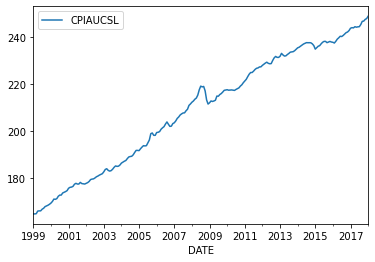

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import pandas_datareader.data as web
import datetime

start = datetime.datetime(1999, 1, 1)

end = datetime.datetime(2018, 1, 27)

data = web.DataReader('CPIAUCSL', 'fred', start, end)
data.plot()
plt.show()

### World Bank

Either from exploring the World Bank site, or using the search function included, every world bank indicator is accessible.

For example, if you wanted to compare the Gross Domestic Products per capita in constant dollars in North America, you would use the search function:

In [224]:
from pandas_datareader import wb
matches = wb.search('gdp.*capita.*const')

matches

,id,name,unit,source,sourceNote,sourceOrganization,topics
716,6.0.GDPpc_constant,"GDP per capita, PPP (constant 2011 internation...",,LAC Equity Lab,GDP per capita based on purchasing power parit...,b'World Development Indicators (World Bank)',Economy & Growth
9260,NY.GDP.PCAP.KD,GDP per capita (constant 2010 US$),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9262,NY.GDP.PCAP.KN,GDP per capita (constant LCU),,World Development Indicators,GDP per capita is gross domestic product divid...,"b'World Bank national accounts data, and OECD ...",Economy & Growth
9264,NY.GDP.PCAP.PP.KD,"GDP per capita, PPP (constant 2017 internation...",,World Development Indicators,GDP per capita based on purchasing power parit...,"b'International Comparison Program, World Bank...",Economy & Growth
9265,NY.GDP.PCAP.PP.KD.87,"GDP per capita, PPP (constant 1987 internation...",,WDI Database Archives,,b'',


In [225]:
data = wb.download(indicator='NY.GDP.PCAP.KD', country=['USA', 'CAN', 'MX', 'PT'], start=2005, end=2008)

data

NY.GDP.PCAP.KD
country       year                
Canada        2008    48495.204040
              2007    48534.174477
              2006    45857.996552
              2005    44471.080060
Mexico        2008     9587.636339
              2007     9622.047957
              2006     9547.333571
              2005     9270.656542
Portugal      2008    22859.369322
              2007    22819.503523
              2006    22305.244487
              2005    21988.188787
United States 2008    49319.478865
              2007    49856.281490
              2006    49405.767296
              2005    48499.812374

In [232]:
wb.search('cell.*%')

,id,name,unit,source,sourceNote,sourceOrganization,topics
7560,IT.CEL.COVR.ZS,Population covered by mobile cellular network (%),,WDI Database Archives,Population covered by a mobile-cellular networ...,"b'International Telecommunication Union, World...",
7615,IT.MOB.COV.ZS,Population coverage of mobile cellular telepho...,,Africa Development Indicators,Please cite the International Telecommunicatio...,"b'International Telecommunication Union, World...",


In [243]:
ind = ['NY.GDP.PCAP.KD', 'IT.MOB.COV.ZS']
dat = wb.download(indicator=ind, country='all', start=2010, end=2011)
dat.columns = ['gdp', 'cellphone']
dat

gdp  cellphone
country                        year                         
Arab World                     2011   6021.905038        NaN
                               2010   5946.380950        NaN
Caribbean small states         2011   9102.493704        NaN
                               2010   9074.324391        NaN
Central Europe and the Baltics 2011  13015.351612        NaN
...                                           ...        ...
Uganda                         2010           NaN      100.0
Zambia                         2011           NaN       62.0
                               2010           NaN       90.0
Zimbabwe                       2011           NaN       72.4
                               2010           NaN       61.0

[648 rows x 2 columns]

### IEX Finance (NOW REQUIRES API KEY)

In [227]:
import pandas_datareader.data as web

from datetime import datetime

start = datetime(2015, 2, 9)

end = datetime(2018, 8, 29)

#apple = web.DataReader('AAPL', 'iex', start, end)

## API - JSON

### Eurostat

[Eurostat Query Builder](https://ec.europa.eu/eurostat/web/json-and-unicode-web-services/getting-started/query-builder)

![](./image.png)

In [12]:
import requests, json
import io

euro_stat_vars = ['B1GQ']
labels = ['GDP']

url_base = "http://ec.europa.eu/eurostat/wdds/rest/data/v2.1/json/en/"
data_base = 'namq_10_gdp'
variable = 'B1GQ'
geo = 'EA12'
url = url_base + data_base +  '?na_item=' + variable + '&precision=1&geo=' + geo + '&unit=CLV_I10&s_adj=SCA&time=1999Q4&time=2000Q1&time=2000Q2&time=2000Q3&time=2000Q4&time=2001Q1&time=2001Q2&time=2001Q3&time=2001Q4&time=2002Q1&time=2002Q2&time=2002Q3&time=2002Q4&time=2003Q1&time=2003Q2&time=2003Q3&time=2003Q4&time=2004Q1&time=2004Q2&time=2004Q3&time=2004Q4&time=2005Q1&time=2005Q2&time=2005Q3&time=2005Q4&time=2006Q1&time=2006Q2&time=2006Q3&time=2006Q4&time=2007Q1&time=2007Q2&time=2007Q3&time=2007Q4&time=2008Q1&time=2008Q2&time=2008Q3&time=2008Q4&time=2009Q1&time=2009Q2&time=2009Q3&time=2009Q4&time=2010Q1&time=2010Q2&time=2010Q3&time=2010Q4&time=2011Q1&time=2011Q2&time=2011Q3&time=2011Q4&time=2012Q1&time=2012Q2&time=2012Q3&time=2012Q4&time=2013Q1&time=2013Q2&time=2013Q3&time=2013Q4&time=2014Q1&time=2014Q2&time=2014Q3&time=2014Q4&time=2015Q1&time=2015Q2&time=2015Q3&time=2015Q4&time=2016Q1&time=2016Q2&time=2016Q3&time=2016Q4&time=2017Q1&time=2017Q2&time=2017Q3&time=2017Q4&time=2018Q1&time=2018Q2&time=2018Q3&time=2018Q4&time=2019Q1&time=2019Q2&time=2019Q3&time=2019Q4'
r = requests.get(url)
data_json = json.loads(r.text)
data = pd.DataFrame(list(data_json['value'].values()), columns=['GDP'], index = list(data_json['dimension']['time']['category']['index'].keys()))
data

,GDP
1999Q4,87.423
2000Q1,88.492
2000Q2,89.283
2000Q3,89.780
2000Q4,90.376
...,...
2018Q4,111.282
2019Q1,111.763
2019Q2,112.028
2019Q3,112.252


---

# Data Analysis

### Linear Regression

You can do regression analysis with many alternative functions/classes in python. Two well documented modules are:

- StatsModels

- scikit-learn

The first one is a more classical approach to regression while the second library is a machine learning module that includes regression.

#### Define your own OLS class

The linear model is given by:

$$ Y = X\beta + \epsilon$$

The OLS estimator is given by:

$$ \hat{\beta}_{OLS} = (X'X)^{-1}X'Y$$

$$ \hat{\epsilon} = Y - X \hat{\beta}_{OLS}$$

### Exercise 14.3

1. Write a function that given data estimates the coefficients by OLS.
2. Write a function that given data and OLS estimates gives the residuals.
3. Write a OLS class that has as atributes the OLS coefficients and the residuals.

In [261]:
import pandas as pd

import numpy as np

import statsmodels.api as sm # more natural for Matlab users

import statsmodels.formula.api as smf # more natural for R users

# Load data
dat = pd.read_csv('https://vincentarelbundock.github.io/Rdatasets/csv/Ecdat/Wages1.csv')

# Fit regression model (using the natural log of one of the regressors)
results = smf.ols('wage ~ exper', data=dat).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.714
Date:                Fri, 26 Jun 2020   Prob (F-statistic):            0.00318
Time:                        14:37:18   Log-Likelihood:                -8571.0
No. Observations:                3294   AIC:                         1.715e+04
Df Residuals:                    3292   BIC:                         1.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      5.1678      0.208     24.875      0.0

Alternatively, we could use arrays directly instead of a formula:

In [260]:
X = dat['exper']

X = sm.add_constant(X)

y = dat['wage']

# Fit regression model
results = sm.OLS(y, X).fit()

# Inspect the results
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                   wage   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     8.714
Date:                Fri, 26 Jun 2020   Prob (F-statistic):            0.00318
Time:                        14:36:33   Log-Likelihood:                -8571.0
No. Observations:                3294   AIC:                         1.715e+04
Df Residuals:                    3292   BIC:                         1.716e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          5.1678      0.208     24.875      0.0

### Exercise 14.4

- Get unemployment and inflation (consumer price) annual data from 1960 to 2016. Download the data from FRED either manually or download it using the datareader. 

- Do a scatter plot of inflation and unemployment.

- Regress inflation on unemployment. Use both statsmodels and your own OLS class.

- Plot the regression line fit on top of the scatter plot.
